<div style="text-align:center; font-size:50px;">
    <b>TECHNOHACKS</b>
</div>


---

## ***Task 2 - Sentiment Analysis*** 

---

# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use(["seaborn"])
import seaborn as sns


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_10328\2046110984.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn"])


# CREATING DATAFRAME OBJECT

In [2]:
df=pd.read_csv(r"C:\Users\Irshad Yasseen A\Documents\ML\datasets\Classification\Nlp\Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Selecting Features

In [3]:
df=df[['airline_sentiment','text']]
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


# Frequency plot

Text(0.5, 1.0, 'PIE')

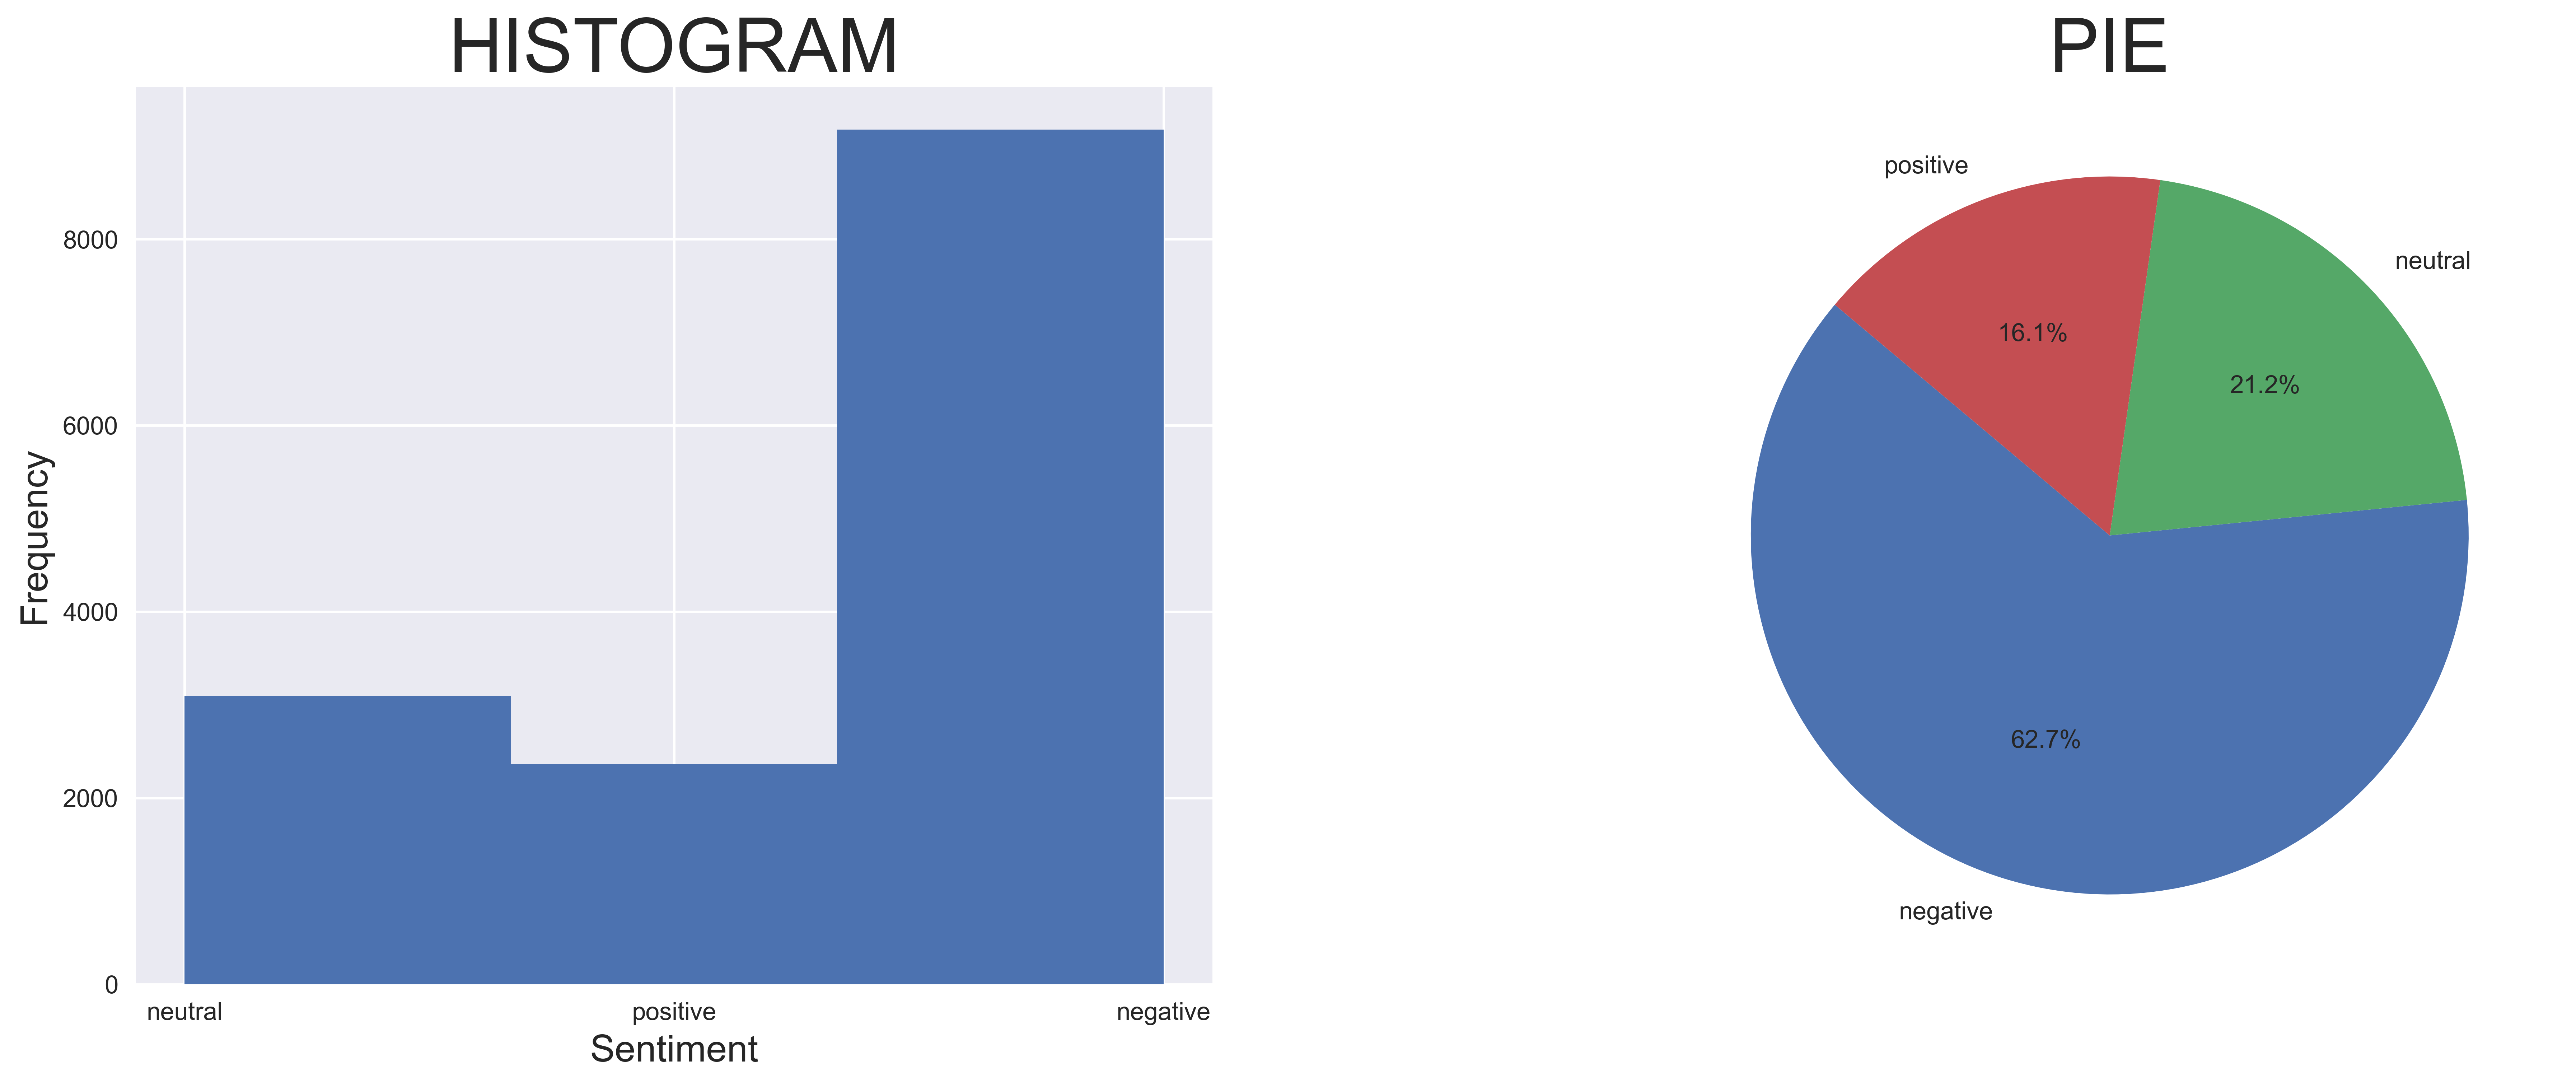

In [4]:
fig=plt.figure(figsize=(10,5),dpi=500)

ax1=fig.add_axes([0,0.5,0.6,1])
ax2=fig.add_axes([0.6,0.5,1,1])

ax1.set_title("HISTOGRAM",fontsize=30)
ax1.hist(df["airline_sentiment"],bins=3)
ax1.set_xlabel("Sentiment",fontsize=15)
ax1.set_ylabel("Frequency",fontsize=15)
sentiment_counts = df['airline_sentiment'].value_counts()

ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('PIE',fontsize=30)




# Manually Encoding The Catagory Column " airline_sentiment"

In [5]:
df["airline_sentiment"]=df['airline_sentiment'].replace({'neutral':1,
                                                        "positive":2,
                                                        "negative":0})

In [6]:
df

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...
2,1,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,2,@AmericanAir thank you we got on a different f...
14636,0,@AmericanAir leaving over 20 minutes Late Flig...
14637,1,@AmericanAir Please bring American Airlines to...
14638,0,"@AmericanAir you have my money, you change my ..."


# Preprocessing text column

### Importing sub dependencies

In [7]:
import re
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


### Defining a new column

In [8]:
corpus=[]
df['corpus']=df['text']
df

,airline_sentiment,text,corpus
0,1,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials t...,@VirginAmerica plus you've added commercials t...
2,1,@VirginAmerica I didn't today... Must mean I n...,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,2,@AmericanAir thank you we got on a different f...,@AmericanAir thank you we got on a different f...
14636,0,@AmericanAir leaving over 20 minutes Late Flig...,@AmericanAir leaving over 20 minutes Late Flig...
14637,1,@AmericanAir Please bring American Airlines to...,@AmericanAir Please bring American Airlines to...
14638,0,"@AmericanAir you have my money, you change my ...","@AmericanAir you have my money, you change my ..."


### Getting stopwords

In [9]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Function to convert 

#### Text Preprocessing and Stemming

In [15]:
ps=PorterStemmer()

# Function to preprocess and stem text
def preprocess_text(text):
    # Remove special characters and convert to lowercase
    cleaned_text = re.sub("[^a-zA-Z']", " ", text).lower()                        #1 cleaning (Removing Special Characters & Lowercasing)
    
    # Split the cleaned text into words
    words = cleaned_text.split()                                                  #2 spliting (converting text to list) AKA Tokenization
    
    # Stem and remove stopwords
    stemmed_words = [ps.stem(word) for word in words if word not in stop_words]    #3 stemming & Stopword Removal
    
    # Join the stemmed words back into a sentence
    return ' '.join(stemmed_words)                                                 #4 Converting list of words again back to string (Reconstruction)

# Apply the preprocessing function to the 'text' column     
df['corpus'] = df['text'].apply(preprocess_text)                                                      

In [16]:
df

,airline_sentiment,text,corpus
0,1,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,2,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki
2,1,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...
3,0,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...
4,0,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing
...,...,...,...
14635,2,@AmericanAir thank you we got on a different f...,americanair thank got differ flight chicago
14636,0,@AmericanAir leaving over 20 minutes Late Flig...,americanair leav minut late flight warn commun...
14637,1,@AmericanAir Please bring American Airlines to...,americanair pleas bring american airlin blackb...
14638,0,"@AmericanAir you have my money, you change my ...",americanair money chang flight answer phone su...


## CountVectorization 

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(df['corpus']).toarray() 
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Analysing CountVectorizer Result


In [42]:
(cv.get_feature_names_out()).__len__()

10878

In [44]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [25]:
CountVectorizer?


Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

Read more in the :ref:`User Guide <text_feature_extraction>`.

Parameters
----------
input : {'filename', 'file', 'content'}, default='content'
    - If `'filename'`, the sequ

In [125]:
tokens=pd.DataFrame(x,columns=cv.get_feature_names_out())
tokens=tokens.append(tokens.sum(),ignore_index=True)
#tokens.iloc[-1, tokens.iloc[-1] > 10]
tokens.iloc[-1, (tokens.iloc[-1] > 500).values]


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_10328\2384153732.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tokens=tokens.append(tokens.sum(),ignore_index=True)


airlin            556
americanair      2964
amp               683
back              534
bag               771
book              515
call              792
can               545
cancel           1065
co               1216
custom            946
day               577
delay            1012
fli               714
flight           4880
flightl           526
gate              543
get              1623
go                639
help             1063
hold              687
hour             1170
http             1211
jetblu           2367
need              689
one               589
plane             735
pleas             576
seat              518
servic           1002
southwestair     2461
still             586
thank            1702
time              988
tri               586
unit             4160
us                705
usairway         3054
virginamerica     524
wait              754
would             561
Name: 14640, dtype: int64

In [12]:
x.shape

(14640, 15051)

In [17]:
y=df['airline_sentiment'].value_counts
y

<bound method IndexOpsMixin.value_counts of 0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64>

# CREATING A BAG OF WORDS MODEL

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB  # Import Multinomial Naive Bayes


results = []

X_TO_SCORE = x  # Replace 'X' with your feature matrix
Y_TO_SCORE = y  # Replace 'y' with your target variable for classification

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Multinomial Naive Bayes', MultinomialNB())  # Include Multinomial Naive Bayes
]

for name, model in models:
    model.fit(X_TO_SCORE, Y_TO_SCORE)
    
    results.append(
        {
            "model": name,
            "Cross_Validation_Score": (cross_val_score(model, X_TO_SCORE, Y_TO_SCORE, cv=3)).mean()
        }
    )

re_df = pd.DataFrame(results)
print(re_df)

c:\Users\Irshad Yasseen A\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Irshad Yasseen A\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

                      model  Cross_Validation_Score
0       Logistic Regression                0.726025
1  Decision Tree Classifier                0.627732
2  Random Forest Classifier                0.728142
3    Support Vector Machine                0.730396
4   Multinomial Naive Bayes                0.717350


# Displaying Results

In [102]:
re_df

,model,Cross_Validation_Score
0,Logistic Regression,0.726025
1,Decision Tree Classifier,0.627732
2,Random Forest Classifier,0.728142
3,Support Vector Machine,0.730396
4,Multinomial Naive Bayes,0.717350


# Re-tuned code

In [114]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress tracking

# Create an empty DataFrame to store confusion matrices
confusion_matrices = pd.DataFrame(columns=['Model', 'Confusion_Matrix'])

results = []

X_TO_SCORE = x  # Replace 'X' with your feature matrix
Y_TO_SCORE = y  # Replace 'y' with your target variable for classification

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('SVM - Linear Kernel', SVC(kernel='linear')),               # Linear kernel for text classification
    ('SVM - RBF Kernel', SVC(kernel='rbf')),                     # RBF kernel (Gaussian) for text classification
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Gaussian Naive Bayes', GaussianNB()),                      # Gaussian Naive Bayes for text classification
    ('Complement Naive Bayes', ComplementNB()),                  # Complement Naive Bayes for text classification
    ('Bernoulli Naive Bayes', BernoulliNB())                     # Bernoulli Naive Bayes for text classification
]

# Initialize tqdm to track progress
for name, model in tqdm(models, desc='Processing Models'):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_TO_SCORE, Y_TO_SCORE, cv=3)
    
    # Make predictions using cross-validation
    y_pred = cross_val_predict(model, X_TO_SCORE, Y_TO_SCORE, cv=3)
    
    # Calculate confusion matrix
    cm = confusion_matrix(Y_TO_SCORE, y_pred)
    
    
    results.append(
        {
            "model": name,
            "Cross_Validation_Score": cv_scores.mean(),
            "Accuracy": accuracy
        }
    )
    
    # Append confusion matrix to the separate DataFrame
    confusion_matrices = confusion_matrices.append({'Model': name, 'Confusion_Matrix': cm}, ignore_index=True)

re_df = pd.DataFrame(results)


Processing Models:   0%|          | 0/9 [00:00<?, ?it/s]c:\Users\Irshad Yasseen A\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Irshad Yasseen A\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

In [143]:
re_df

,model,Cross_Validation_Score,Accuracy
0,Logistic Regression,0.726025,0.726025
1,Decision Tree Classifier,0.629986,0.601230
2,Random Forest Classifier,0.728757,0.728552
3,SVM - Linear Kernel,0.713866,0.713866
4,SVM - RBF Kernel,0.730396,0.730396
5,Multinomial Naive Bayes,0.717350,0.717350
6,Gaussian Naive Bayes,0.431762,0.431762
7,Complement Naive Bayes,0.729167,0.729167
8,Bernoulli Naive Bayes,0.707514,0.707514


In [148]:
re_df.sort_values(by='Cross_Validation_Score')

,model,Cross_Validation_Score,Accuracy
6,Gaussian Naive Bayes,0.431762,0.431762
1,Decision Tree Classifier,0.629986,0.601230
8,Bernoulli Naive Bayes,0.707514,0.707514
3,SVM - Linear Kernel,0.713866,0.713866
5,Multinomial Naive Bayes,0.717350,0.717350
0,Logistic Regression,0.726025,0.726025
2,Random Forest Classifier,0.728757,0.728552
7,Complement Naive Bayes,0.729167,0.729167
4,SVM - RBF Kernel,0.730396,0.730396


In [127]:
confusion_matrices


,Model,Confusion_Matrix
0,Logistic Regression,"[[7610, 1108, 460], [1227, 1562, 310], [586, 3..."
1,Decision Tree Classifier,"[[6242, 1719, 1217], [1185, 1269, 645], [677, ..."
2,Random Forest Classifier,"[[8085, 868, 225], [1493, 1376, 230], [820, 33..."
3,SVM - Linear Kernel,"[[7456, 1152, 570], [1198, 1521, 380], [578, 3..."
4,SVM - RBF Kernel,"[[8027, 893, 258], [1473, 1426, 200], [784, 33..."
5,Multinomial Naive Bayes,"[[8305, 578, 295], [1698, 1050, 351], [977, 23..."
6,Gaussian Naive Bayes,"[[3936, 1972, 3270], [692, 943, 1464], [460, 4..."
7,Complement Naive Bayes,"[[8047, 626, 505], [1368, 1186, 545], [656, 26..."
8,Bernoulli Naive Bayes,"[[8466, 554, 158], [1876, 1073, 150], [1251, 2..."


# Visualizing Confusion Matrix

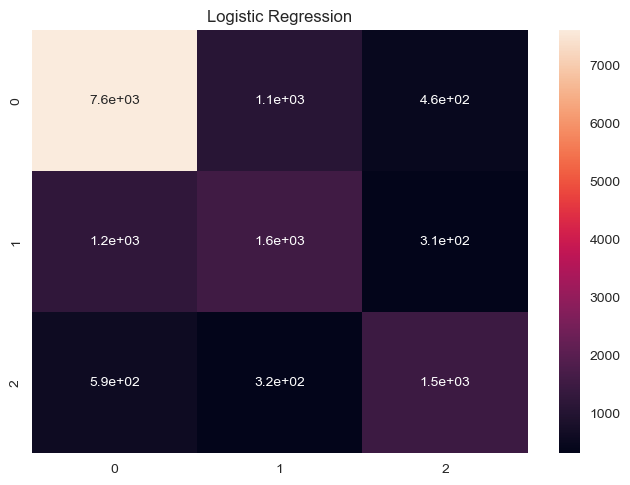

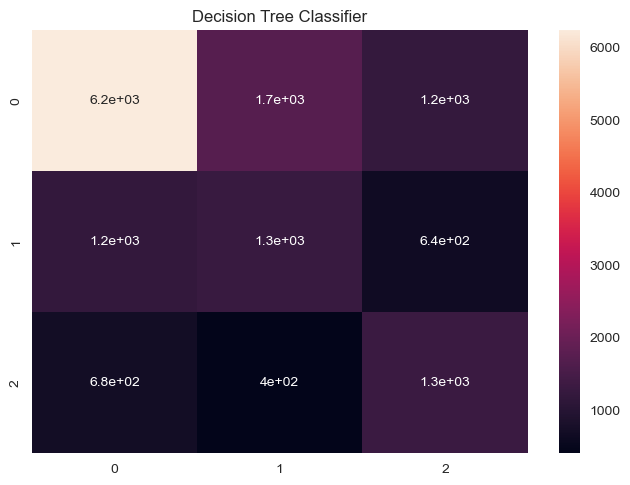

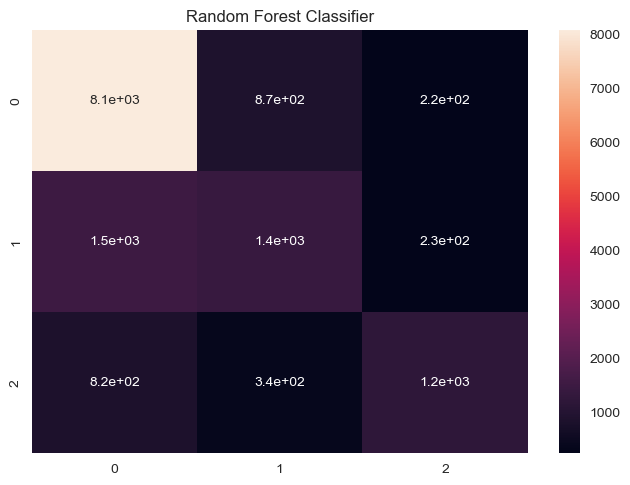

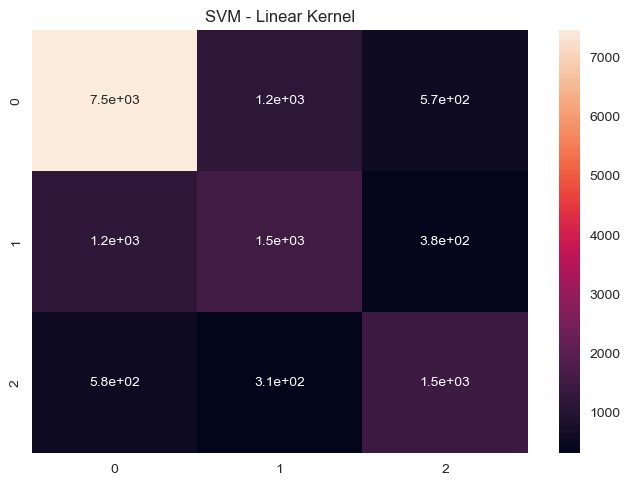

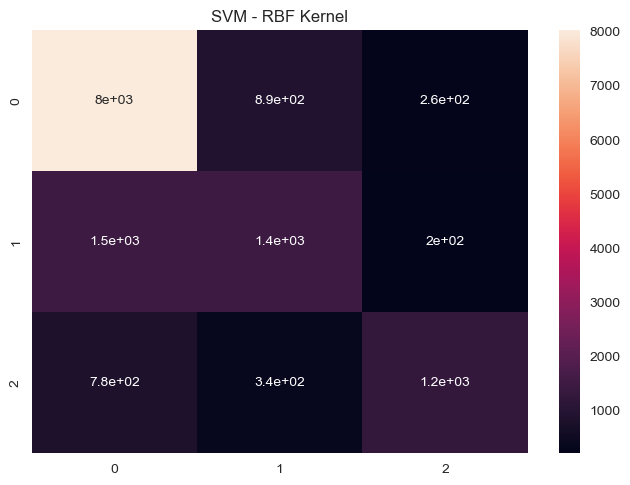

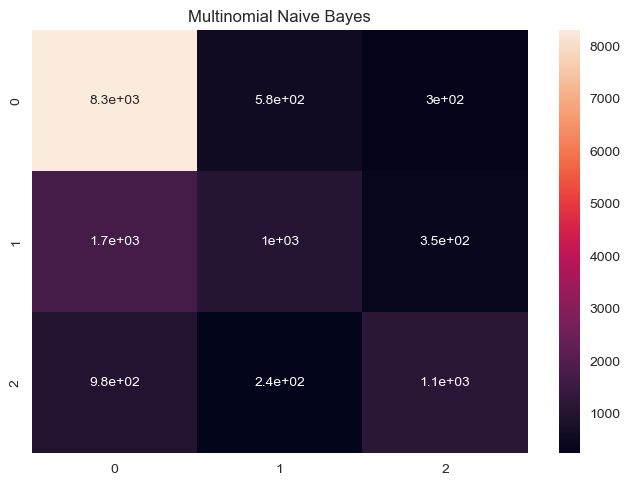

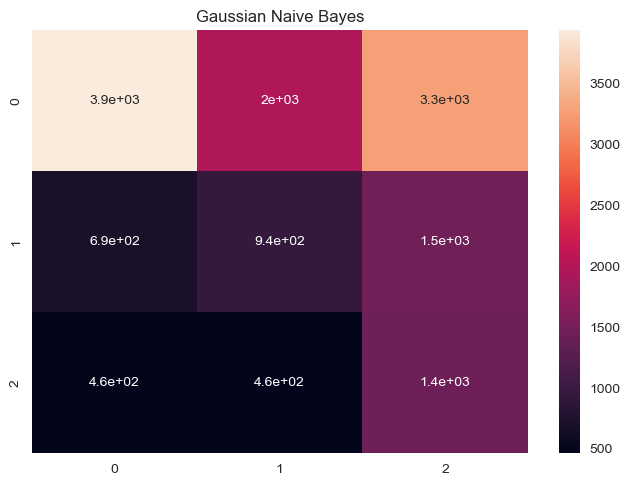

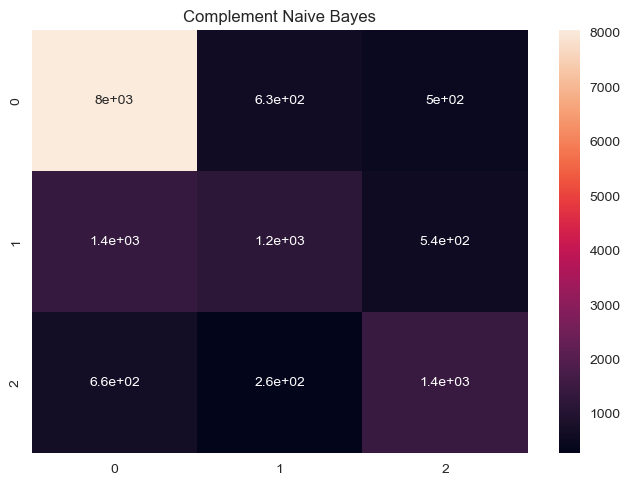

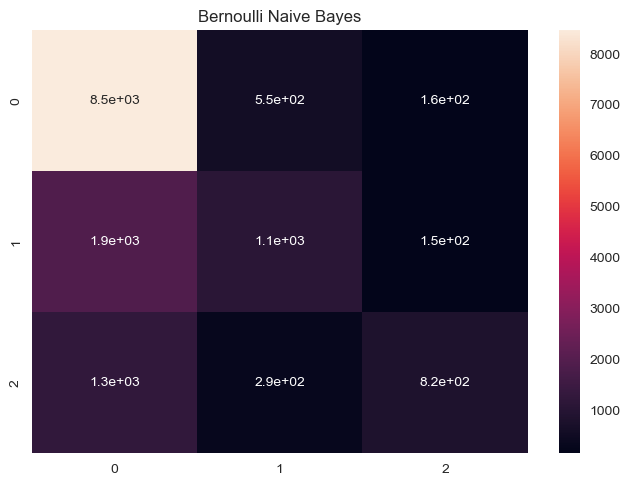

In [138]:
import seaborn as sns
for i,j in confusion_matrices.values:
    
    plt.figure()
    sns.heatmap(j,annot=True)
    plt.title(i)

# Trying to improve accuracy

In [36]:

# Initialize a new column 'corpus' with empty strings
df['corpus_new'] = ""
df

,airline_sentiment,text,corpus,corpus_new
0,1,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,
1,2,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,
2,1,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,
3,0,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,
4,0,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,
...,...,...,...,...
14635,2,@AmericanAir thank you we got on a different f...,americanair thank got differ flight chicago,
14636,0,@AmericanAir leaving over 20 minutes Late Flig...,americanair leav minut late flight warn commun...,
14637,1,@AmericanAir Please bring American Airlines to...,americanair pleas bring american airlin blackb...,
14638,0,"@AmericanAir you have my money, you change my ...",americanair money chang flight answer phone su...,


In [45]:
negative_words = set([
    "weren't", "no", "can't", "mustn", "hasn", "haven't", "didn't", "wasn't", "wouldn't", "isn't","doesn",'t','isn','off','don't'
    "shouldn't", "shan't", "mightn't", "aren't", "won't", "hadn't", "not", "hadn't"
])


were,theirs,but,what,whom,to,the,weren't,no,when,i,here,about,now,that'll,itself,hasn,she,can,mustn,has,you'd,hers,him,herself,being,because,some,doesn,these,under,you've,t,isn,re,between,off,its,don't,shan't,them,haven't,you're,hadn,most,wasn't,be,didn,didn't,been,below,ours,weren,mightn't,you,wouldn't,with,that,do,doing,of,once,only,while,needn't,at,ain,in,there,which,wouldn,into,her,during,then,further,yourselves,should,again,themselves,those,yourself,than,o,against,from,as,it's,very,wasn,shouldn't,above,through,your,up,are,doesn't,was,mightn,shouldn,both,if,all,each,myself,any,why,a,after,aren't,or,more,hasn't,she's,ourselves,nor,this,shan,until,ll,is,other,same,so,y,mustn't,couldn't,have,ma,they,himself,having,down,won,and,his,you'll,me,own,over,on,how,their,just,we,before,our,it,haven,d,am,had,should've,did,s,by,will,where,don,m,my,won't,few,not,who,hadn't,yours,an,too,he,for,ve,aren,needn,isn't,such,couldn,does,out,

In [57]:
stopwords=stopwords-{'t'}

TypeError: unsupported operand type(s) for -: 'WordListCorpusReader' and 'set'

In [51]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define a list of negative words to retain
negative_words = set([
    "weren't", "no", "can't", "mustn", "hasn", "haven't", "didn't", "wasn't", "wouldn't", "isn't", 
    "shouldn't", "shan't", "mightn't", "aren't", "won't", "hadn't", "not", "hadn't"
])

# Function to preprocess and stem text
def preprocess_text(text):
    # Remove special characters and convert to lowercase
    text=text.lower()
    cleaned_text = re.sub("[^a-zA-Z']", " ", text)
    
    # Split the cleaned text into words
    words = cleaned_text.split()
    
    # Stem and remove stopwords, excluding negative words
    stemmed_words = [ps.stem(word) if word not in negative_words else word for word in words if word not in stop_words]
    
    # Join the stemmed words back into a sentence
    return ' '.join(stemmed_words)
"""
# Function to preprocess and stem text
def preprocess_text(text):
    # Remove special characters and convert to lowercase
    text=text.lower()
    # Split the cleaned text into words
    words = text.split()
    words = re.sub("[^a-zA-Z']", " ", text)
    
    # Stem and remove stopwords, excluding negative words
    stemmed_words = [ps.stem(word) if word not in negative_words else word for word in words if word not in stop_words]
    
    # Join the stemmed words back into a sentence
    return ' '.join(stemmed_words)
"""
# Apply the preprocessing function to the 'text' column
df['corpus_new'] = df['text'].apply(preprocess_text)


In [53]:
df

,airline_sentiment,text,corpus,corpus_new
0,1,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,virginamerica dhepburn said
1,2,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,virginamerica plu ad commerci experi tacki
2,1,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,virginamerica today must mean need take anoth ...
3,0,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,virginamerica realli aggress blast obnoxi ente...
4,0,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,virginamerica realli big bad thing
...,...,...,...,...
14635,2,@AmericanAir thank you we got on a different f...,americanair thank got differ flight chicago,americanair thank got differ flight chicago
14636,0,@AmericanAir leaving over 20 minutes Late Flig...,americanair leav minut late flight warn commun...,americanair leav minut late flight warn commun...
14637,1,@AmericanAir Please bring American Airlines to...,americanair pleas bring american airlin blackb...,americanair pleas bring american airlin blackb...
14638,0,"@AmericanAir you have my money, you change my ...",americanair money chang flight answer phone su...,americanair money chang flight answer phone su...


In [108]:
df["res"]=df["corpus"]==df['corpus_new']

In [35]:
df

,airline_sentiment,text,corpus,corpus_new
0,1,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,
1,2,@VirginAmerica plus you've added commercials t...,virginamerica plu ad commerci experi tacki,
2,1,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anoth ...,
3,0,@VirginAmerica it's really aggressive to blast...,virginamerica realli aggress blast obnoxi ente...,
4,0,@VirginAmerica and it's a really big bad thing...,virginamerica realli big bad thing,
...,...,...,...,...
14635,2,@AmericanAir thank you we got on a different f...,americanair thank got differ flight chicago,
14636,0,@AmericanAir leaving over 20 minutes Late Flig...,americanair leav minut late flight warn commun...,
14637,1,@AmericanAir Please bring American Airlines to...,americanair pleas bring american airlin blackb...,
14638,0,"@AmericanAir you have my money, you change my ...",americanair money chang flight answer phone su...,


In [111]:
df['res'].value_counts()

True     13153
False     1487
Name: res, dtype: int64

In [115]:
df[['corpus',"corpus_new"]].iloc[df.res==False]

NotImplementedError: iLocation based boolean indexing on an integer type is not available